


<p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">WELCOME!</p>

___

![image.png](https://t3.ftcdn.net/jpg/03/41/64/20/360_F_341642046_nov3zad1MQVPdUuReyXAJj6IaILLFF1s.jpg)



In this project,I applied EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering was done.

This project was aiming to improve my ability to implement algorithms for Multi-Class Classification. Thus, I had the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, let's take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---
**WARNING!**

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

If you want to study on this field, you should follow:

- Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

- You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.


# Steps

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries


In [40]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from xgboost import XGBClassifier
import xgboost as xgb
# to sketch the result graphs
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score
import pickle

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.options.display.max_rows = 210
pd.options.display.max_columns = 210

## Ingesting Data
Links:
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [41]:
df_male = pd.read_csv("ANSUR II MALE Public.csv",encoding_errors= "replace")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv")
df_female

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0         10037                             231            1282   
1         10038                             194            1379   
2         10042                             183            1369   
3         10043                             261            1356   
4         10051                             309            1303   
...         ...                             ...             ...   
1981      29501                             285            1392   
1982      29502                             262            1324   
1983      29503                             260            1334   
1984      29511                             205            1293   
1985     920103                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       301                 204          1180   
1                       320                 207          1292   
2                       329                 233          1271   
3                       306                 214          1250   
4                       308                 214          1210   
...                     ...                 ...           ...   
1981                    335                 223          1297   
1982                    301                 202          1204   
1983                    318                 213          1259   
1984                    302                 199          1207   
1985                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         222               177                373   
1                         225               178                372   
2                         237               196                397   
3                         240               188                384   
4                         217               182                378   
...                       ...               ...                ...   
1981                      252               196                368   
1982                      236               181                378   
1983                      234               183                363   
1984                      213               163                376   
1985                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           315               263               466   
1                           272               250               430   
2                           300               276               450   
3                           364               276               484   
4                           320               336               525   
...                         ...               ...               ...   
1981                        299               312               477   
1982                        294               287               468   
1983                        332               299               460   
1984                        276               280               426   
1985                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     65               338                        301   
1                     64               294                        270   
2                     69               309                        270   
3                     68               340                        294   
4                     67               300                        295   
...                  ...               ...                        ...   
1981                  72               306                        282   
1982                  66               309                        311   
1983                  70               317                        311

In [42]:
df_male

subjectid  abdominalextensiondepthsitting  acromialheight  \
0         10027                             266            1467   
1         10032                             233            1395   
2         10033                             287            1430   
3         10092                             234            1347   
4         10093                             250            1585   
...         ...                             ...             ...   
4077      29442                             235            1353   
4078      29443                             247            1473   
4079      29447                             264            1394   
4080      29451                             203            1417   
4081      29452                             327            1523   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
4077                    312                 216          1263   
4078                    336                 234          1346   
4079                    313                 227          1280   
4080                    327                 223          1314   
4081                    358                 226          1408   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
4077                      228               193                384   
4078                      253               196                428   
4079                      245               193                407   
4080                      250               196                419   
4081                      269               225                442   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
4077                        318               241               457   
4078                        374               284               536   
4079                        367               271               501   
4080                        365               271               493   
4081                        379               275               531   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     71               319                        291   
1                     67               344                        320   
2                     75               345                        330   
3                     73               328                        309   
4                     80               340                        310   
...                  ...               ...                        ...   
4077                  70               321                        301   
4078                  76               319                        316   
4079                  74               323                        316

In [43]:
(df_male.columns != df_female.columns).sum(), (df_female.columns == df_male.columns).sum()

(1, 107)

As the data frames consists from exactly the same columns, I can concat them.

In [44]:
df_female.columns = df_male.columns

In [45]:
df_female

subjectid  abdominalextensiondepthsitting  acromialheight  \
0         10037                             231            1282   
1         10038                             194            1379   
2         10042                             183            1369   
3         10043                             261            1356   
4         10051                             309            1303   
...         ...                             ...             ...   
1981      29501                             285            1392   
1982      29502                             262            1324   
1983      29503                             260            1334   
1984      29511                             205            1293   
1985     920103                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       301                 204          1180   
1                       320                 207          1292   
2                       329                 233          1271   
3                       306                 214          1250   
4                       308                 214          1210   
...                     ...                 ...           ...   
1981                    335                 223          1297   
1982                    301                 202          1204   
1983                    318                 213          1259   
1984                    302                 199          1207   
1985                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         222               177                373   
1                         225               178                372   
2                         237               196                397   
3                         240               188                384   
4                         217               182                378   
...                       ...               ...                ...   
1981                      252               196                368   
1982                      236               181                378   
1983                      234               183                363   
1984                      213               163                376   
1985                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           315               263               466   
1                           272               250               430   
2                           300               276               450   
3                           364               276               484   
4                           320               336               525   
...                         ...               ...               ...   
1981                        299               312               477   
1982                        294               287               468   
1983                        332               299               460   
1984                        276               280               426   
1985                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     65               338                        301   
1                     64               294                        270   
2                     69               309                        270   
3                     68               340                        294   
4                     67               300                        295   
...                  ...               ...                        ...   
1981                  72               306                        282   
1982                  66               309                        311   
1983                  70               317                        311

In [46]:
df = pd.concat([df_male, df_female])

In [47]:
df.head(7).T

0               1               2  \
subjectid                              10027           10032           10033   
abdominalextensiondepthsitting           266             233             287   
acromialheight                          1467            1395            1430   
acromionradialelength                    337             326             341   
anklecircumference                       222             220             230   
axillaheight                            1347            1293            1327   
balloffootcircumference                  253             245             256   
balloffootlength                         202             193             196   
biacromialbreadth                        401             394             427   
bicepscircumferenceflexed                369             338             408   
bicristalbreadth                         274             257             261   
bideltoidbreadth                         493             479             544   
bimalleolarbreadth                        71              67              75   
bitragionchinarc                         319             344             345   
bitragionsubmandibulararc                291             320             330   
bizygomaticbreadth                       142             135             135   
buttockcircumference                     979             944            1054   
buttockdepth                             240             232             258   
buttockheight                            882             870             901   
buttockkneelength                        619             584             623   
buttockpopliteallength                   509             468             506   
calfcircumference                        373             357             412   
cervicaleheight                         1535            1471            1501   
chestbreadth                             291             269             288   
chestcircumference                      1074            1021            1120   
chestdepth                               259             253             267   
chestheight                             1292            1244            1288   
crotchheight                             877             851             854   
crotchlengthomphalion                    607             615             636   
crotchlengthposterioromphalion           351             376             359   
earbreadth                                36              33              40   
earlength                                 71              62              61   
earprotrusion                             19              18              23   
elbowrestheight                          247             232             237   
eyeheightsitting                         802             781             810   
footbreadthhorizontal                    101              98             103   
footlength                               273             263             270   
forearmcenterofgriplength                349             348             355   
forearmcircumferenceflexed               299             289             357   
forearmforearmbreadth                    575             523             575   
forearmhandlength                        477             476             491   
functionalleglength                     1136            1096            1115   
handbreadth                               90              86              93   
handcircumference                        214             203             220   
handlength                               193             195             203   
headbreadth                              150             146             148   
headcircumference                        583             568             573   
headlength                               206             201             202   
heelanklecircumference                   326             334             356   
heelbreadth                               7

In [48]:
df.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [49]:
df.isna().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [50]:
df.duplicated().sum()

0

In [51]:
df.Date.value_counts(dropna=False) # will be dropped

27-Feb-12    45
5-Apr-12     44
21-Feb-12    43
28-Feb-12    43
5-Mar-12     43
             ..
11-Feb-11     3
25-May-11     2
7-Apr-11      2
7-Sep-11      1
16-Nov-10     1
Name: Date, Length: 253, dtype: int64

In [52]:
df.Installation.value_counts() # shows where the measurements occured, will be dropped

Camp Shelby       1160
Fort Bliss         963
Fort Gordon        669
Fort McCoy         452
Camp Atterbury     441
Fort Hood          439
Fort Huachuca      436
Fort Bragg         397
Fort Drum          391
Fort Lee           380
Fort Stewart       339
Fort Rucker          1
Name: Installation, dtype: int64

In [53]:
df.Component.value_counts() # will be dropped

Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: Component, dtype: int64

In [54]:
df.Branch.value_counts() 

Combat Service Support    3174
Combat Arms               1582
Combat Support            1312
Name: Branch, dtype: int64

<AxesSubplot:ylabel='Branch,DODRace'>

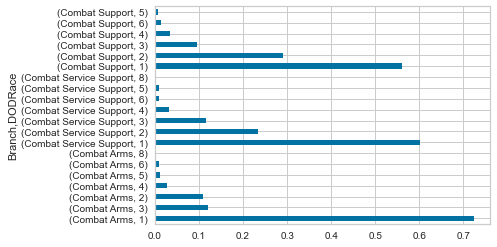

In [55]:
df.groupby(["Branch"])["DODRace"].value_counts(dropna=False, normalize = True).plot(kind="barh") # will be dropped

In [56]:
df.PrimaryMOS.value_counts() # show "– Primary Military Occupational Specialty" so will be dropped

11B     671
88M     320
92A     288
91B     230
68W     222
       ... 
15D       1
25G       1
915E      1
19B       1
76B       1
Name: PrimaryMOS, Length: 285, dtype: int64

In [57]:
df.SubjectsBirthLocation.value_counts() 

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Arizona                      84
Missouri                     84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

In [58]:
df.SubjectNumericRace.value_counts() # will be dropped

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [59]:
df.Ethnicity.value_counts(dropna=False) # as there are lots of null values, so it also will be dropped

NaN                                                   4647
Mexican                                                357
Puerto Rican                                           183
Caribbean Islander                                     124
Filipino                                                67
Cherokee                                                65
Korean                                                  53
Dominican                                               32
Chinese                                                 26
Japanese                                                22
Vietnamese                                              21
Colombian                                               17
Cuban                                                   17
Arab or Middle Eastern                                  17
Salvadoran                                              16
East/Asian Indian                                       13
Samoan                                                  

In [60]:
df.DODRace.value_counts() # Since won't help me to get a right insight, DODRace cells which is less than 500 in total
# will be dropped

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [61]:
df["DODRace"] = df.DODRace.map({1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"})

In [62]:
df.Age.value_counts() # no extreme values

21    383
22    372
23    354
24    336
20    320
26    311
25    311
28    278
27    272
19    246
31    233
29    227
30    215
33    156
32    154
41    147
42    141
40    141
38    135
37    127
39    127
35    126
34    116
36    115
18    112
44     94
43     85
45     75
46     58
47     56
48     50
50     40
49     39
51     31
53     23
52     17
54     13
56     12
55      9
58      5
57      4
17      2
Name: Age, dtype: int64

In [63]:
df.Heightin.value_counts() # will be dropped as there is another column to show this

69    628
70    573
71    557
66    554
68    532
67    519
72    478
64    386
65    324
73    291
63    274
74    236
62    229
75    117
61    102
60     83
76     68
77     36
59     35
78     15
80      7
57      6
79      5
58      5
56      3
81      2
87      1
86      1
94      1
Name: Heightin, dtype: int64

In [64]:
df.Weightlbs.value_counts() # there is another column that shows the weight of soldiers
# so this also will be dropped

170    234
150    233
180    232
160    215
175    211
185    204
165    202
190    191
200    180
155    162
140    155
210    151
195    147
145    147
135    125
220    114
215    111
130    107
205     98
225     77
230     73
125     59
148     59
168     58
178     57
120     53
158     50
240     49
187     46
138     46
235     43
153     42
198     42
128     39
162     39
127     37
167     36
173     36
147     36
174     36
143     35
172     35
137     34
250     34
182     33
156     33
152     33
169     33
183     32
184     31
154     31
142     31
157     31
188     31
132     29
194     29
193     29
163     29
177     28
196     28
197     28
192     26
181     26
115     26
176     25
110     25
212     23
245     23
164     23
133     22
186     22
203     22
218     22
161     22
124     21
189     21
136     21
118     20
166     20
204     20
171     20
207     19
206     19
208     19
179     19
141     19
139     19
149     18
260     18
126     18
144     18

In [65]:
df.WritingPreference.value_counts() # will be dropped

Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: WritingPreference, dtype: int64

In [66]:
[df.DODRace.value_counts() < 500]

[White               False
 Black               False
 Hispanic            False
 Asian                True
 Pacific Islander     True
 Native American      True
 Other                True
 Name: DODRace, dtype: bool]

In [67]:
indexes = df.loc[df.DODRace.isin(["Asian", "Native American", "Pacific Islander", "Other"]),:].index

In [68]:
df.drop(index=indexes, inplace=True)

In [69]:
df.DODRace.value_counts()

White       3669
Black       1261
Hispanic     659
Name: DODRace, dtype: int64

In [70]:
df.drop(columns=["subjectid","Date","Installation","Component","Branch",
                "PrimaryMOS","SubjectNumericRace",  "Weightlbs", "Heightin" ,
                "Ethnicity","WritingPreference"],inplace=True)

In [71]:
df.shape

(5589, 97)

In [72]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5589 entries, 0 to 1985
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5589 non-null   int64 
 1   acromialheight                  5589 non-null   int64 
 2   acromionradialelength           5589 non-null   int64 
 3   anklecircumference              5589 non-null   int64 
 4   axillaheight                    5589 non-null   int64 
 5   balloffootcircumference         5589 non-null   int64 
 6   balloffootlength                5589 non-null   int64 
 7   biacromialbreadth               5589 non-null   int64 
 8   bicepscircumferenceflexed       5589 non-null   int64 
 9   bicristalbreadth                5589 non-null   int64 
 10  bideltoidbreadth                5589 non-null   int64 
 11  bimalleolarbreadth              5589 non-null   int64 
 12  bitragionchinarc                5589 non-null   

In [73]:
df.reset_index(drop=True, inplace=True)

## Exploring Data

In [84]:
# df.iplot(kind="box")

In [81]:
# df.iplot(kind="hist",bins=100)

<AxesSubplot:>

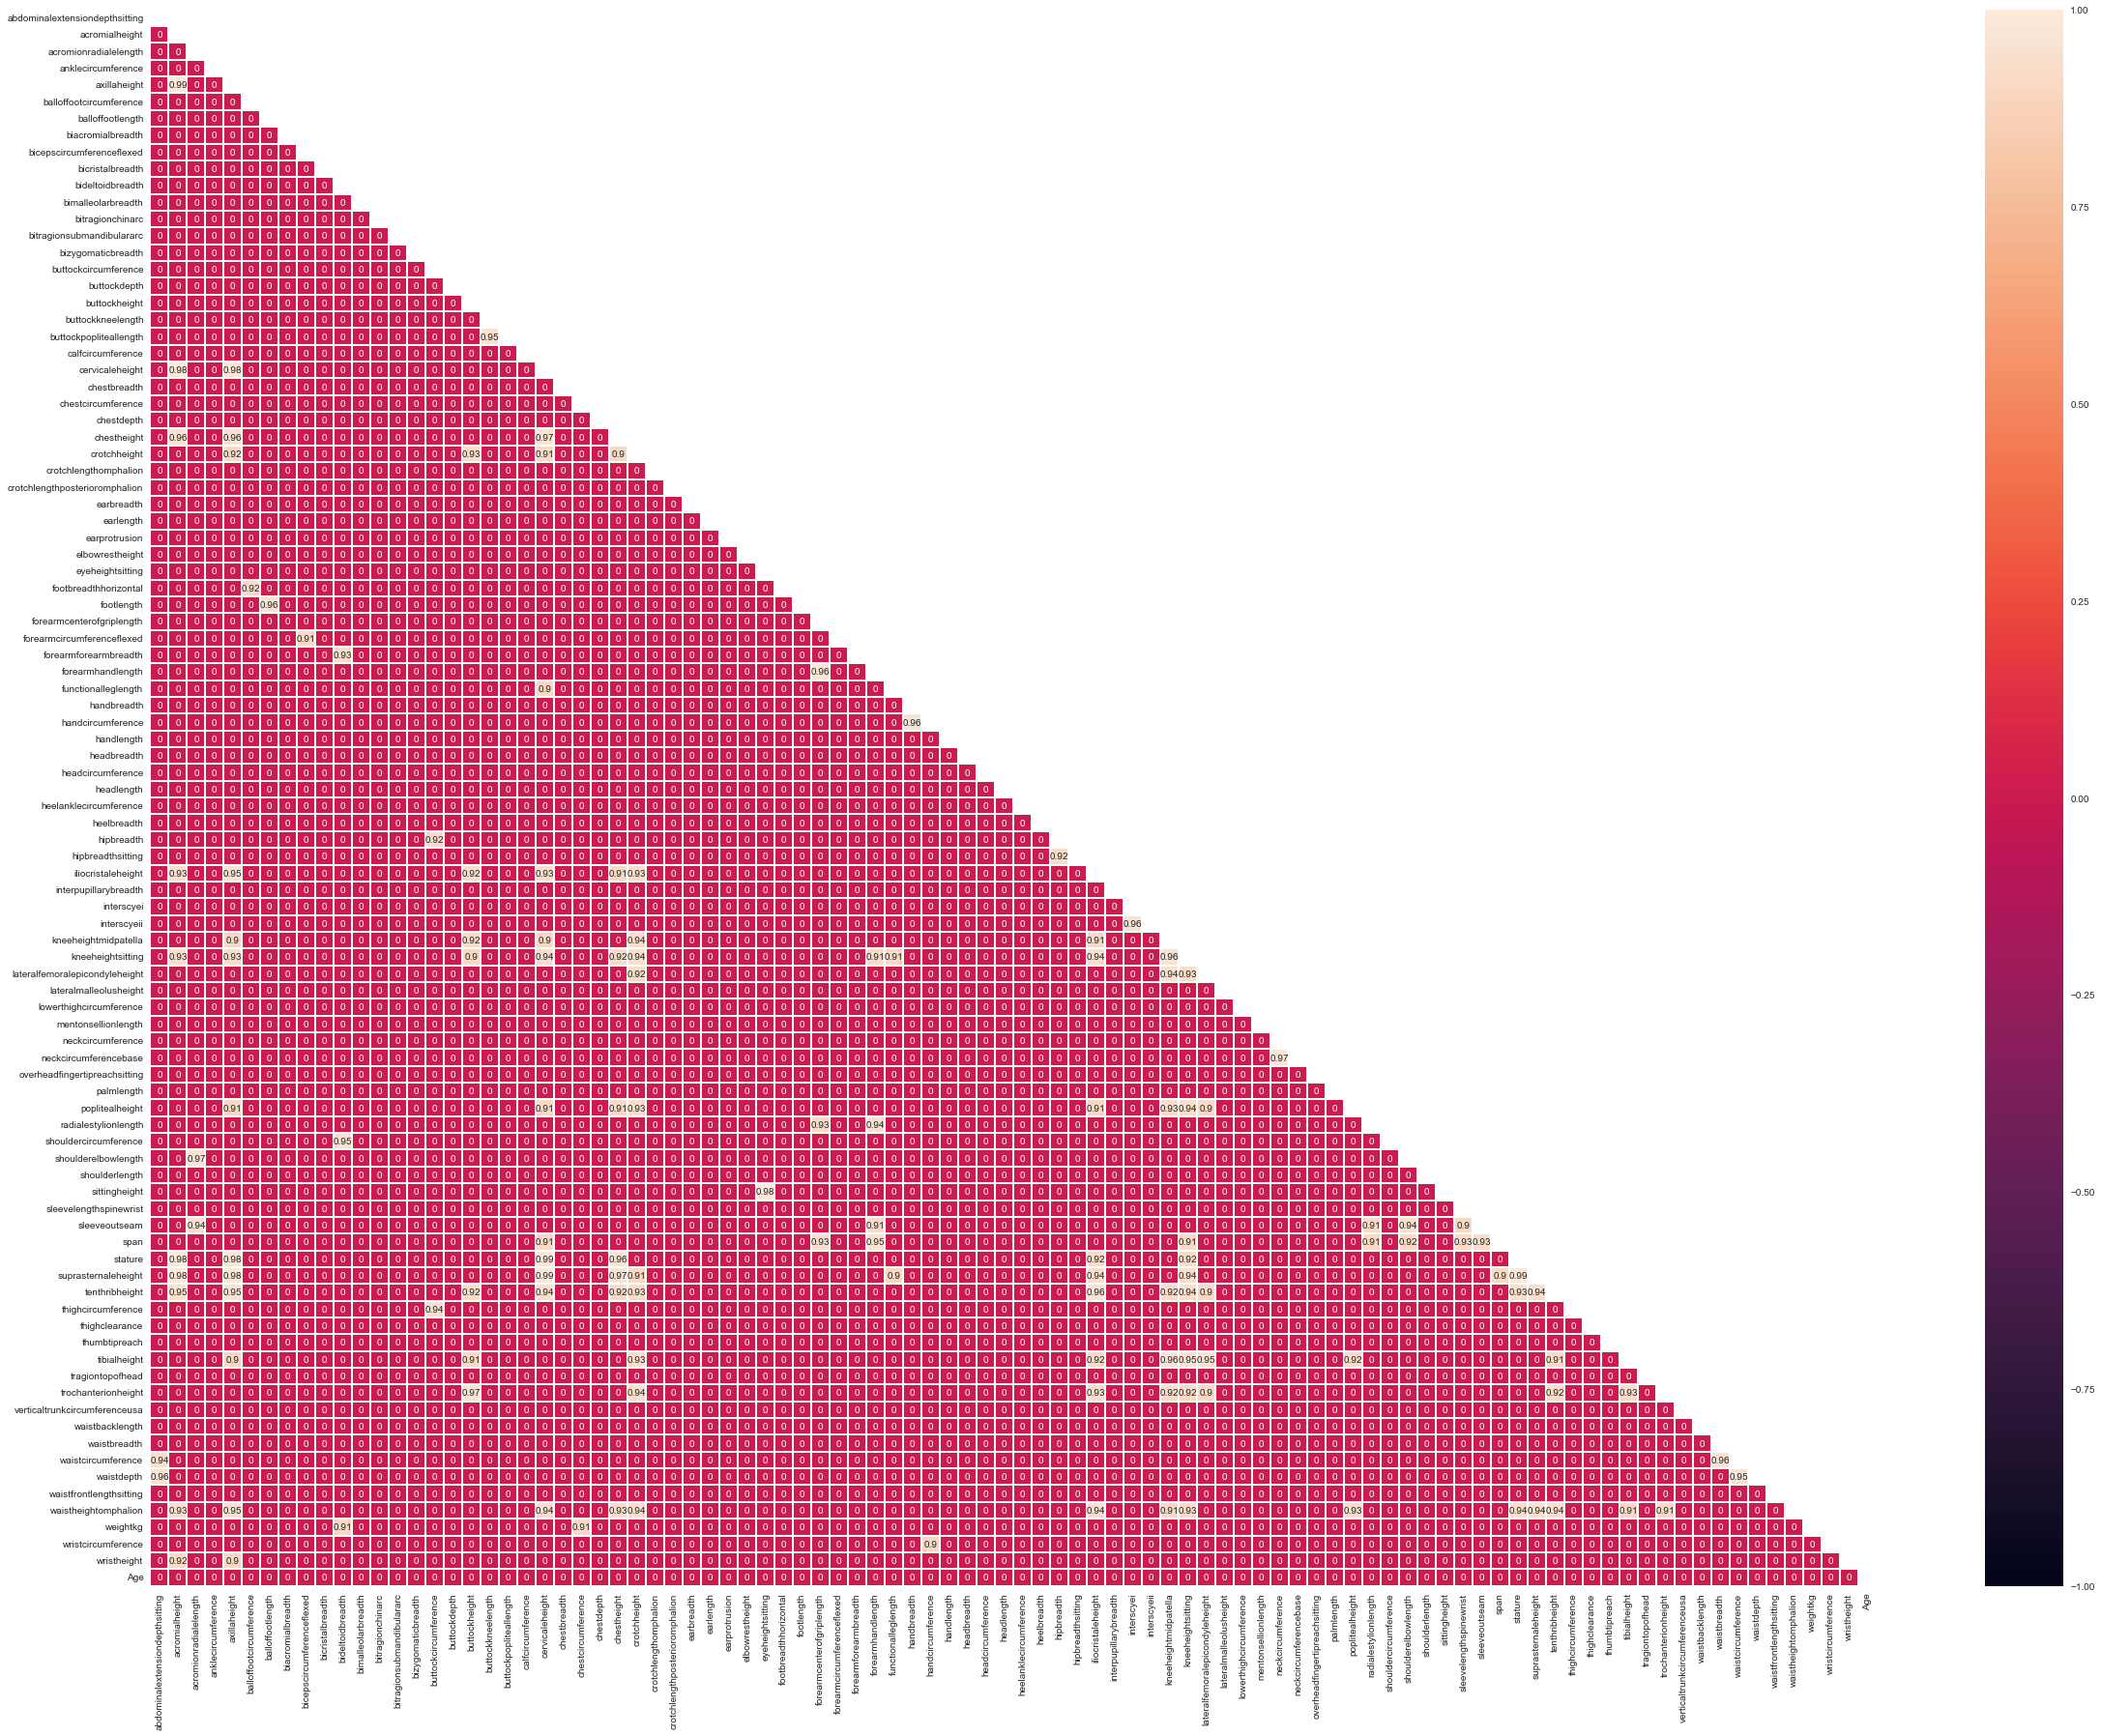

In [80]:
plt.figure(figsize=(40,30))

df_corr = df.corr()
df_corr[(df_corr < 0.9) & (df_corr >-0.9)] = 0
mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, mask=mask, vmax=1, vmin=-1, linewidths=-0.1, annot=True)

In [77]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)


In [78]:
check_multicolinarity(df)

Multicolinarity Data (57, 57)


In [79]:
df.describe().T[df.describe().T["std"] > df.describe().T["mean"]]

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [42]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


## Features and Target Variable Split

In [43]:
df.shape

(5589, 97)

In [44]:
X = df.drop(columns=["DODRace"])
y = df["DODRace"]

In [45]:
cat = X.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation'], dtype='object')

## Train - Test Splitting

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [47]:
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((OneHotEncoder(handle_unknown = "ignore", sparse = False), cat),
                                      remainder = MinMaxScaler())

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## Logistic model

### Vanilla Logistic Model

In [48]:
log_model = LogisticRegression(class_weight="balanced", max_iter=10000)

In [49]:
process = [("OneHotEnconder", column_trans), ("log_model", log_model)]

log_pipe_model = Pipeline(steps=process)

In [50]:
log_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEnconder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('log_model',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [51]:
eval_metric(log_pipe_model,X_train, y_train, X_test, y_test)

Test_Set
[[238  10   4]
 [  5 106  21]
 [ 16  80 638]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       252
    Hispanic       0.54      0.80      0.65       132
       White       0.96      0.87      0.91       734

    accuracy                           0.88      1118
   macro avg       0.81      0.87      0.83      1118
weighted avg       0.90      0.88      0.89      1118


Train_Set
[[ 944   33   32]
 [  20  440   67]
 [  63  340 2532]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1009
    Hispanic       0.54      0.83      0.66       527
       White       0.96      0.86      0.91      2935

    accuracy                           0.88      4471
   macro avg       0.81      0.88      0.83      4471
weighted avg       0.90      0.88      0.88      4471



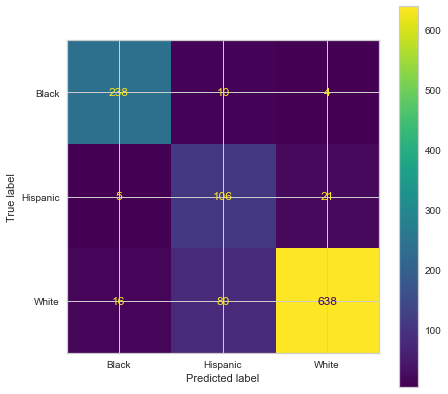

In [52]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(log_pipe_model, X_test, y_test, ax=ax);

### Hispanic Scores with CV

In [53]:
hispanic_scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels = ["Hispanic"]),
          "precision_Hispanic" : make_scorer(precision_score, average = None, labels = ["Hispanic"]),
          "recall_Hispanic" : make_scorer(recall_score, average = None, labels= ["Hispanic"])}

In [54]:
process = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight= "balanced", max_iter=10000) )]

pipe_model = Pipeline(steps=process)

scores = cross_validate(pipe_model, X_train, y_train, scoring=hispanic_scoring, cv = 10,error_score="raise")
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic           0.609988
test_precision_Hispanic    0.502320
test_recall_Hispanic       0.780225
dtype: float64

### Cross Validation for Vanilla Model

In [55]:
model = Pipeline(process)
scores = cross_validate(model, X_train, y_train, 
                        scoring = ["accuracy","precision_weighted","recall_weighted","f1_weighted"],
                       cv = 10)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_accuracy              0.857306
test_precision_weighted    0.887741
test_recall_weighted       0.857306
test_f1_weighted           0.866841
dtype: float64

### Logistic Model GridsearchCV

In [56]:
recall_hispanic = make_scorer(recall_score, average = None, labels= ["Hispanic"])

scaler = MinMaxScaler()

In [57]:
model = Pipeline([("OneHotEncoder", column_trans), ("log_model", log_model)])

In [58]:
penalty = ["l1","l2"]
C = [1, 5, 10]
solver = ["lbfgs", "liblinear", "sag", "saga", "newton-cg"]

param_grid = {
    "log_model__penalty" : penalty,
    "log_model__C" : C,
    "log_model__solver" : solver
}

In [59]:
grid_model = GridSearchCV(model, param_grid = param_grid, cv = 5)

In [60]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000))]),
             param_grid={'log_model__C': [1, 5, 10],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 

In [61]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__penalty': 'l2',
 'log_model__solver': 'liblinear'}

In [62]:
grid_model.best_score_

0.8948775823928612

In [63]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[240   3   9]
 [  6  88  38]
 [ 12  29 693]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94       252
    Hispanic       0.73      0.67      0.70       132
       White       0.94      0.94      0.94       734

    accuracy                           0.91      1118
   macro avg       0.87      0.85      0.86      1118
weighted avg       0.91      0.91      0.91      1118


Train_Set
[[ 937   19   53]
 [  27  365  135]
 [  45  129 2761]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1009
    Hispanic       0.71      0.69      0.70       527
       White       0.94      0.94      0.94      2935

    accuracy                           0.91      4471
   macro avg       0.86      0.85      0.86      4471
weighted avg       0.91      0.91      0.91      4471



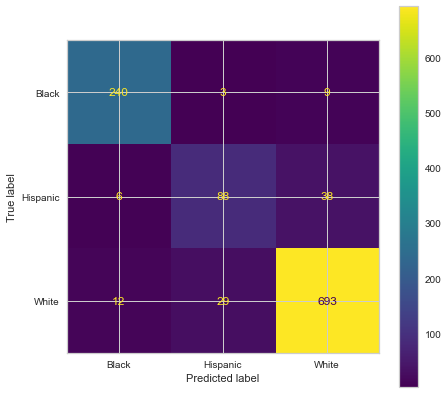

In [64]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(grid_model, X_test, y_test, ax=ax);

### Precision-Recall Curve

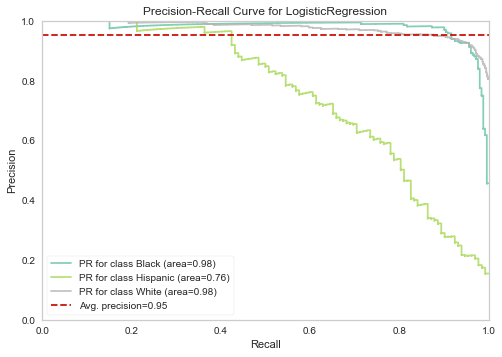

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [65]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    pipe_model,
    per_class= True, classes= ["Black", "Hispanic", "White"],
    cmap= "Set2"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [66]:
viz.score_

{'Black': 0.9780527502076729,
 'Hispanic': 0.7561917735004252,
 'White': 0.9762209722323261,
 'micro': 0.9511941404566315}

In [67]:
y_pred = grid_model.predict(X_test)

log_AP =viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels= ["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None,labels=["Hispanic"])

## SVC

### Vanilla SVC model 

In [68]:
svc_model = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight= "balanced", random_state=101))]

pipe_svc = Pipeline(steps= svc_model)

In [69]:
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [70]:
eval_metric(pipe_svc, X_train, y_train, X_test, y_test)

Test_Set
[[230  14   8]
 [  5 105  22]
 [ 12  90 632]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       252
    Hispanic       0.50      0.80      0.62       132
       White       0.95      0.86      0.91       734

    accuracy                           0.86      1118
   macro avg       0.80      0.86      0.81      1118
weighted avg       0.90      0.86      0.87      1118


Train_Set
[[ 938   31   40]
 [  22  436   69]
 [  54  389 2492]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1009
    Hispanic       0.51      0.83      0.63       527
       White       0.96      0.85      0.90      2935

    accuracy                           0.86      4471
   macro avg       0.80      0.87      0.82      4471
weighted avg       0.90      0.86      0.87      4471



In [71]:
scores = cross_validate(pipe_svc, X_train, y_train, 
                        scoring = hispanic_scoring,
                       cv = 10)

df_scores = pd.DataFrame(scores, index= range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic           0.584842
test_precision_Hispanic    0.471091
test_recall_Hispanic       0.772605
dtype: float64

###  SVC Model GridsearchCV

In [72]:
svc_process = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced", random_state=101))]

svc_pipe_grid = Pipeline(steps=svc_process)

param_grid ={
    'svc__C': [1,2],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

svm_grid_model = GridSearchCV(svc_pipe_grid,
                             param_grid,
                             verbose=3,
                             scoring= hispanic_scoring["recall_Hispanic"],
                             n_jobs=-1)

In [73]:
svm_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             

In [74]:
svm_grid_model.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [75]:
svm_grid_model.best_score_

0.7684995507637018

In [76]:
eval_metric(svm_grid_model,X_train, y_train, X_test, y_test)

Test_Set
[[233  11   8]
 [  5 106  21]
 [ 12  82 640]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93       252
    Hispanic       0.53      0.80      0.64       132
       White       0.96      0.87      0.91       734

    accuracy                           0.88      1118
   macro avg       0.81      0.87      0.83      1118
weighted avg       0.90      0.88      0.88      1118


Train_Set
[[ 947   29   33]
 [  18  446   63]
 [  50  340 2545]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.94      1009
    Hispanic       0.55      0.85      0.66       527
       White       0.96      0.87      0.91      2935

    accuracy                           0.88      4471
   macro avg       0.81      0.88      0.84      4471
weighted avg       0.91      0.88      0.89      4471



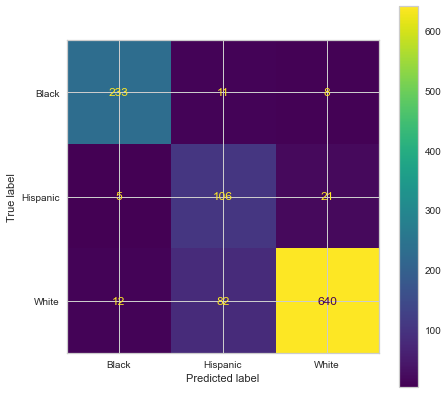

In [77]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(svm_grid_model, X_test, y_test, ax=ax);

### Precision Recall Curve

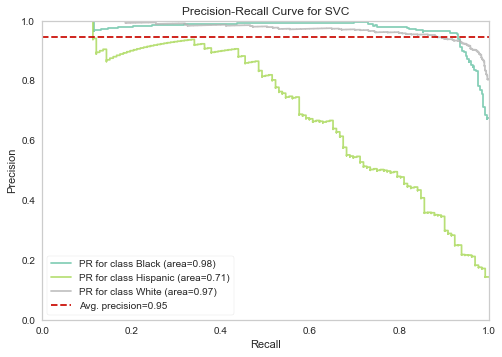

<AxesSubplot:title={'center':'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [78]:
viz = PrecisionRecallCurve(
    pipe_svc,
    per_class= True, classes= ["Black", "Hispanic", "White"],
    cmap= "Set2"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [79]:
viz.score_

{'Black': 0.9754501969557008,
 'Hispanic': 0.7137868086848406,
 'White': 0.9736153419776432,
 'micro': 0.9452838449695293}

In [80]:
y_pred = svm_grid_model.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average= None, labels=["Hispanic"])

## Decision Tree Model

### Vanilla Decision Tree

In [81]:
dt_pipe = Pipeline([("OneHotEncoder", column_trans), ("dt_model", DecisionTreeClassifier(class_weight= "balanced"))])

dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('dt_model', DecisionTreeClassifier(class_weight='balanced'))])

In [82]:
eval_metric(dt_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[161  20  71]
 [ 16  50  66]
 [ 80  75 579]]
              precision    recall  f1-score   support

       Black       0.63      0.64      0.63       252
    Hispanic       0.34      0.38      0.36       132
       White       0.81      0.79      0.80       734

    accuracy                           0.71      1118
   macro avg       0.59      0.60      0.60      1118
weighted avg       0.71      0.71      0.71      1118


Train_Set
[[1009    0    0]
 [   0  527    0]
 [   0    0 2935]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1009
    Hispanic       1.00      1.00      1.00       527
       White       1.00      1.00      1.00      2935

    accuracy                           1.00      4471
   macro avg       1.00      1.00      1.00      4471
weighted avg       1.00      1.00      1.00      4471



### Decision Tree GridSearchCV

In [83]:
param_grid = {
    "dt_model__splitter" : ["best", "random"],
    "dt_model__max_depth" : [2,3,4,5,6,7,8],
    "dt_model__min_samples_leaf" : [1, 2, 3],
    "dt_model__min_samples_split" : [4,5]
}

In [84]:
grid_dt_model = GridSearchCV(estimator= dt_pipe, param_grid= param_grid, scoring= recall_hispanic
                            , cv = 5, n_jobs=-1)

In [85]:
grid_dt_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('dt_model',
                                        DecisionTreeClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'dt_model__max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'dt_model__min_samples_leaf': [1, 2, 3],
                         'dt_model__min_samples_split': [4, 5],
                         'dt_m

In [86]:
grid_dt_model.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('dt_model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                                        min_samples_split=4))])

In [87]:
grid_dt_model.best_params_

{'dt_model__max_depth': 3,
 'dt_model__min_samples_leaf': 1,
 'dt_model__min_samples_split': 4,
 'dt_model__splitter': 'best'}

In [88]:
eval_metric(grid_dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[150  81  21]
 [ 17 102  13]
 [113 494 127]]
              precision    recall  f1-score   support

       Black       0.54      0.60      0.56       252
    Hispanic       0.15      0.77      0.25       132
       White       0.79      0.17      0.28       734

    accuracy                           0.34      1118
   macro avg       0.49      0.51      0.37      1118
weighted avg       0.66      0.34      0.34      1118


Train_Set
[[ 645  273   91]
 [  91  410   26]
 [ 488 1822  625]]
              precision    recall  f1-score   support

       Black       0.53      0.64      0.58      1009
    Hispanic       0.16      0.78      0.27       527
       White       0.84      0.21      0.34      2935

    accuracy                           0.38      4471
   macro avg       0.51      0.54      0.40      4471
weighted avg       0.69      0.38      0.39      4471



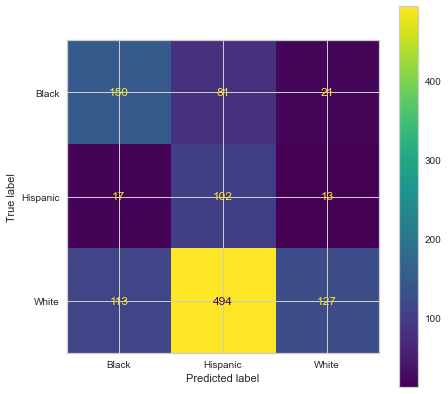

In [89]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(grid_dt_model, X_test, y_test, ax=ax);

### Precision Recall Curve

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1774, in recall_score
    _, r, _, _ = precision_recall_fscore_support(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1469, in precision_recall_fscore_support
    MCM = multilabel_confusion_matrix(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1774, in recall_score
    _, r, _, _ = precision_recall_fscore_support(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1469, in pre

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/ana

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 138, in transform
    return _encode(y, uniques=self.classes_)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 183, in _encode
    diff = _check_unknown(values, uniques)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 255, in _check_unknown
    if np.isnan(known_values).any():
TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

  warnings.warn(
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_se

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1774, in recall_score
    _, r, _, _ = precision_recall_fscore_support(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1469, in precision_recall_fscore_support
    MCM = multilabel_confusion_matrix(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 483, in multilabel_confusion_matrix
    y_true = le.transform(y_true)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", li

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/ana

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 255, in _check_unknown
    if np.isnan(known_values).any():
TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

  warnings.warn(
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1469, in precision_recall_fscore_support
    MCM = multilabel_confusion_matrix(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 483, in multilabel_confusion_matrix
    y_true = le.transform(y_true)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 138, in transform
    return _encode(y, uniques=self.classes_)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 183, in _encode
    diff = _che

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1469, in precision_recall_fscore_support
    MCM = multilabel_confusion_matrix(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 483, in multilabel_confusion_matrix
    y_true = le.transform(y_true)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 138, in transform
    return _encode(y, uniques=self.classes_)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 183, in _encode
    diff = _check_unknown(values, uniques)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 255, in _check_unkno

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1469, in precision_recall_fscore_support
    MCM = multilabel_confusion_matrix(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 483, in multilabel_confusion_matrix
    y_true = le.transform(y_true)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 138, in transform
    return _encode(y, uniques=self.classes_)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 183, in _encode
    diff = _che

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/ana

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1469, in precision_recall_fscore_support
    MCM = multilabel_confusion_matrix(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 483, in multilabel_confusion_matrix
    y_true = le.transform(y_true)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 138, in transform
    return _encode(y, uniques=self.classes_)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 183, in _encode
    diff = _check_unknown(values, uniques)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 255, in _check_unkno

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/ana

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1774, in recall_score
    _, r, _, _ = precision_recall_fscore_support(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/ana

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

    return _encode(y, uniques=self.classes_)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 183, in _encode
    diff = _check_unknown(values, uniques)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 255, in _check_unknown
    if np.isnan(known_values).any():
TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

  warnings.warn(
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set

    return _encode(y, uniques=self.classes_)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 183, in _encode
    diff = _check_unknown(values, uniques)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 255, in _check_unknown
    if np.isnan(known_values).any():
TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

  warnings.warn(
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/ana

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 483, in multilabel_confusion_matrix
    y_true = le.transform(y_true)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 138, in transform
    return _encode(y, uniques=self.classes_)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 183, in _encode
    diff = _check_unknown(values, uniques)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 255, in _check_unknown
    if np.isnan(known_values).any():
TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

  

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 255, in _check_unknown
    if np.isnan(known_values).any():
TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

  warnings.warn(
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(e

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1774, in recall_score
    _, r, _, _ = precision_recall_fscore_support(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1469, in precision_recall_fscore_support
    MCM = multilabel_confusion_matrix(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in 

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/m

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1469, in precision_recall_fscore_support
    MCM = multilabel_confusion_matrix(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 483, in multilabel_confusion_matrix
    y_true = le.transform(y_true)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py", line 138, in transform
    return _encode(y, uniques=self.classes_)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_encode.py", line 183, in _encode
    diff = _che

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/sametgundogan/opt/ana

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

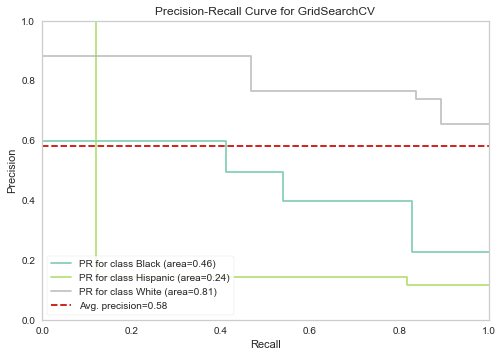

In [90]:
viz = PrecisionRecallCurve(
    grid_dt_model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set2"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [91]:
y_pred = grid_dt_model.predict(X_test)

dt_AP = viz.score_["Hispanic"]
dt_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
dt_recall = recall_score(y_test, y_pred, average= None, labels=["Hispanic"])

### Decision Tree with Bagging 

In [92]:
from sklearn.ensemble import BaggingClassifier

bagging_dt_pipe = Pipeline([("OneHotEncoder", column_trans), ("Bag_DT_model", BaggingClassifier(base_estimator=LogisticRegression()))])

In [93]:
bagging_dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('Bag_DT_model',
                 BaggingClassifier(base_estimator=LogisticRegression()))])

In [94]:
eval_metric(bagging_dt_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[235   2  15]
 [  5  70  57]
 [  7  15 712]]
              precision    recall  f1-score   support

       Black       0.95      0.93      0.94       252
    Hispanic       0.80      0.53      0.64       132
       White       0.91      0.97      0.94       734

    accuracy                           0.91      1118
   macro avg       0.89      0.81      0.84      1118
weighted avg       0.91      0.91      0.90      1118


Train_Set
[[ 917   17   75]
 [  30  292  205]
 [  29   56 2850]]
              precision    recall  f1-score   support

       Black       0.94      0.91      0.92      1009
    Hispanic       0.80      0.55      0.65       527
       White       0.91      0.97      0.94      2935

    accuracy                           0.91      4471
   macro avg       0.88      0.81      0.84      4471
weighted avg       0.90      0.91      0.90      4471



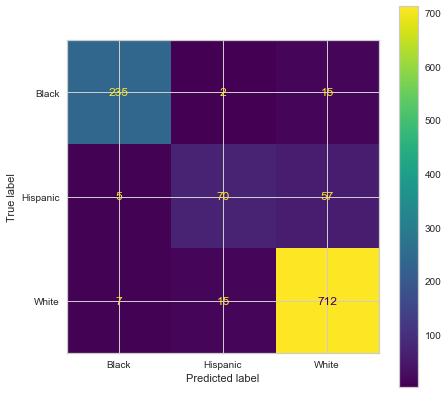

In [95]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(bagging_dt_pipe, X_test, y_test, ax=ax);

### Precision Recall Curve

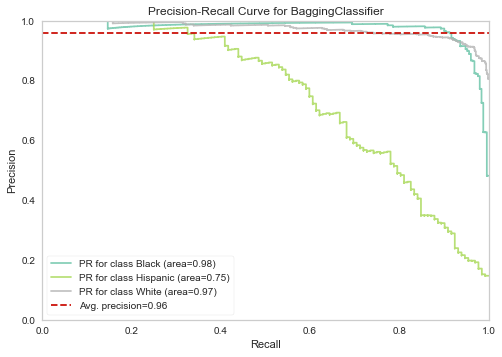

In [96]:
viz = PrecisionRecallCurve(
    bagging_dt_pipe,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set2"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [97]:
y_pred = bagging_dt_pipe.predict(X_test)

dt_bag_AP = viz.score_["Hispanic"]
dt_bag_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
dt_bag_recall = recall_score(y_test, y_pred, average= None, labels=["Hispanic"])

## RF

### Vanilla RF Model

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

rf_pipe = Pipeline([("OrdinalEncoder", column_trans), ("rf_model", RandomForestClassifier(class_weight="balanced",random_state=101))])

In [99]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('rf_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [100]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[182   0  70]
 [  7   7 118]
 [  8   3 723]]
              precision    recall  f1-score   support

       Black       0.92      0.72      0.81       252
    Hispanic       0.70      0.05      0.10       132
       White       0.79      0.99      0.88       734

    accuracy                           0.82      1118
   macro avg       0.81      0.59      0.60      1118
weighted avg       0.81      0.82      0.77      1118


Train_Set
[[1009    0    0]
 [   0  527    0]
 [   0    0 2935]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1009
    Hispanic       1.00      1.00      1.00       527
       White       1.00      1.00      1.00      2935

    accuracy                           1.00      4471
   macro avg       1.00      1.00      1.00      4471
weighted avg       1.00      1.00      1.00      4471



In [101]:
scores = cross_validate(rf_pipe, X_train, y_train, scoring= hispanic_scoring, cv = 5)

df_scores = pd.DataFrame(scores, index=range(1,6))
df_scores.mean()[2:]

test_f1_Hispanic           0.061658
test_precision_Hispanic    0.726667
test_recall_Hispanic       0.032273
dtype: float64

### RF Model GridsearchCV

In [102]:
param_grid = {"rf_model__n_estimators" : [400,500],
             "rf_model__max_depth" : [2,3],
             }

In [103]:
rf_pipe_grid = GridSearchCV(rf_pipe, param_grid, verbose= 3, scoring= recall_hispanic, n_jobs=-1)

In [104]:
rf_pipe_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('rf_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'rf_model__max_depth': [2, 3],
                         'rf_model__n_estimators': [400, 500]},
             scoring=make_score

In [105]:
rf_pipe_grid.best_params_

{'rf_model__max_depth': 2, 'rf_model__n_estimators': 500}

In [106]:
rf_pipe_grid.best_score_

0.6584725965858041

In [107]:
eval_metric(rf_pipe_grid, X_train, y_train, X_test, y_test)

Test_Set
[[162  75  15]
 [ 10  87  35]
 [ 72 315 347]]
              precision    recall  f1-score   support

       Black       0.66      0.64      0.65       252
    Hispanic       0.18      0.66      0.29       132
       White       0.87      0.47      0.61       734

    accuracy                           0.53      1118
   macro avg       0.57      0.59      0.52      1118
weighted avg       0.75      0.53      0.58      1118


Train_Set
[[ 684  239   86]
 [  48  360  119]
 [ 252 1193 1490]]
              precision    recall  f1-score   support

       Black       0.70      0.68      0.69      1009
    Hispanic       0.20      0.68      0.31       527
       White       0.88      0.51      0.64      2935

    accuracy                           0.57      4471
   macro avg       0.59      0.62      0.55      4471
weighted avg       0.76      0.57      0.61      4471



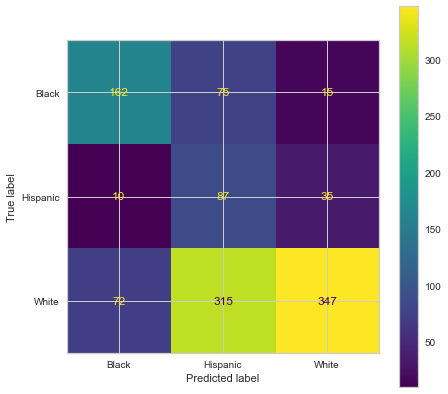

In [108]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(rf_pipe_grid, X_test, y_test, ax=ax);

### Precision Recall Curve

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/m

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/sametgundogan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    

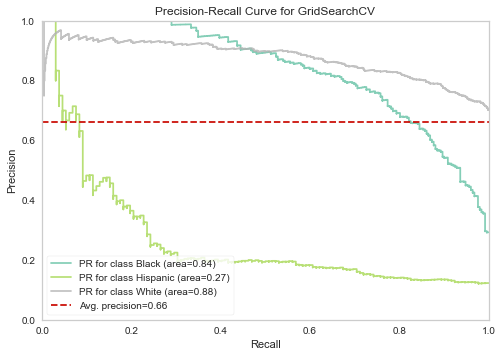

In [109]:
viz = PrecisionRecallCurve(
    rf_pipe_grid,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set2"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [110]:
y_pred = rf_pipe_grid.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## XGBoost

### Vanilla XGBoost Model

In [111]:
xgb_model = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_xgb = Pipeline(steps= xgb_model)

In [112]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

As the classes are not in balance, I have to do it.

In [113]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight="balanced", y= y_train)
classes_weights

array([0.50777967, 0.50777967, 1.47703997, ..., 0.50777967, 0.50777967,
       1.47703997])

In [114]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.477040    1009
Hispanic  2.827957     527
White     0.507780    2935
Name: 0, dtype: int64

In [115]:
pipe_xgb.fit(X_train, y_train, XGB_model__sample_weight = classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [116]:
eval_metric(pipe_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[222  18  12]
 [  8  83  41]
 [ 34  94 606]]
              precision    recall  f1-score   support

       Black       0.84      0.88      0.86       252
    Hispanic       0.43      0.63      0.51       132
       White       0.92      0.83      0.87       734

    accuracy                           0.81      1118
   macro avg       0.73      0.78      0.75      1118
weighted avg       0.84      0.81      0.83      1118


Train_Set
[[ 951   25   33]
 [  16  450   61]
 [  84  307 2544]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1009
    Hispanic       0.58      0.85      0.69       527
       White       0.96      0.87      0.91      2935

    accuracy                           0.88      4471
   macro avg       0.81      0.89      0.84      4471
weighted avg       0.91      0.88      0.89      4471



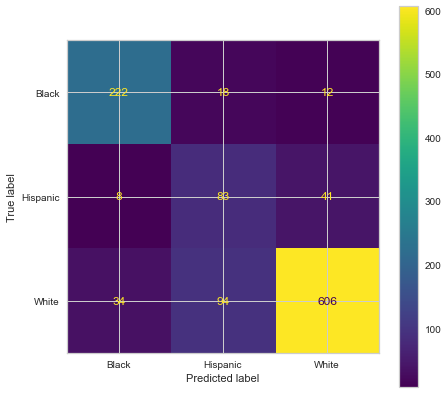

In [117]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(pipe_xgb, X_test, y_test, ax=ax);

In [118]:
scores = cross_validate(pipe_xgb, X_train, y_train, scoring = hispanic_scoring, cv = 5,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.499248
test_precision_Hispanic    0.416847
test_recall_Hispanic       0.622426
dtype: float64

### XGBoost Model GridsearchCV

In [119]:
param_grid = {"XGB_model__n_estimators":[50, 100],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [120]:
xgb_grid = GridSearchCV(pipe_xgb, param_grid, scoring= recall_hispanic, n_jobs=-1, verbose= 2)

In [121]:
xgb_grid.fit(X_train, y_train, XGB_model__sample_weight= classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(objective='multi:softprob',
                                                      random_state=101))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.1, 0.3],
                         'XGB_mode

In [122]:
xgb_grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(learning_rate=0.3, max_depth=2, n_estimators=50,
                               objective='multi:softprob', random_state=101))])

In [123]:
xgb_grid.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.3,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 50,
 'XGB_model__subsample': 1}

In [124]:
xgb_grid.best_score_

0.6471159029649596

In [125]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[222  19  11]
 [ 11  81  40]
 [ 34 107 593]]
              precision    recall  f1-score   support

       Black       0.83      0.88      0.86       252
    Hispanic       0.39      0.61      0.48       132
       White       0.92      0.81      0.86       734

    accuracy                           0.80      1118
   macro avg       0.71      0.77      0.73      1118
weighted avg       0.84      0.80      0.81      1118


Train_Set
[[ 927   40   42]
 [  26  426   75]
 [ 105  411 2419]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90      1009
    Hispanic       0.49      0.81      0.61       527
       White       0.95      0.82      0.88      2935

    accuracy                           0.84      4471
   macro avg       0.77      0.85      0.80      4471
weighted avg       0.88      0.84      0.85      4471



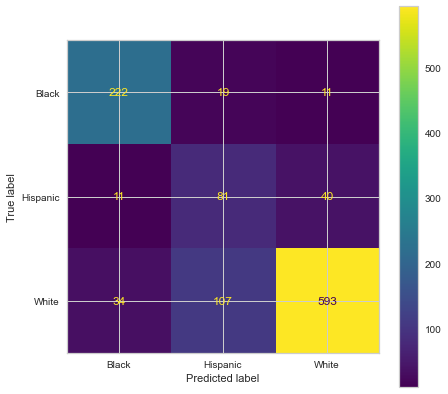

In [126]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(xgb_grid, X_test, y_test, ax=ax);

### Precision Recall Curve

In [127]:
from scikitplot.metrics import plot_roc, precision_recall_curve, plot_precision_recall

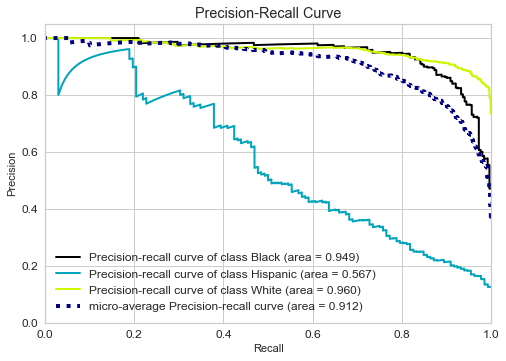

In [128]:
process_xbg = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(colsample_bytree=1,
                                                                            learning_rate=0.3,
                                                                            max_depth=2,
                                                                            n_estimator= 50,
                                                                            subsample=1,
                                                                            random_state=101))]
xgb_pipe = Pipeline(steps= process_xbg)

xgb_pipe.fit(X_train, y_train, XGB_model__sample_weight= classes_weights)

y_pred_proba = xgb_pipe.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [129]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.5669831666968341

In [130]:
y_pred = xgb_grid.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# Comparing The Model Scores

In [133]:
data = {"Model": ["Logistic Regression", "SVM", "DT","DT_bagging", "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], dt_f1[0], dt_bag_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], dt_recall[0], dt_bag_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP,dt_AP, dt_bag_AP, rf_AP, xgb_AP]}

[CV 3/5] END ........svc__C=1, svc__gamma=scale;, score=0.733 total time=   5.3s
[CV 2/5] END ............svc__C=1, svc__gamma=1;, score=0.571 total time=   6.5s
[CV 1/5] END .........svc__C=1, svc__gamma=0.01;, score=0.745 total time=   5.5s
[CV 5/5] END ........svc__C=2, svc__gamma=scale;, score=0.726 total time=   3.5s
[CV 2/5] END ............svc__C=2, svc__gamma=1;, score=0.505 total time=   7.5s
[CV 1/5] END .........svc__C=2, svc__gamma=0.01;, score=0.783 total time=   4.3s
[CV 4/5] END rf_model__max_depth=2, rf_model__n_estimators=400;, score=0.724 total time=   1.6s
[CV 5/5] END rf_model__max_depth=2, rf_model__n_estimators=500;, score=0.632 total time=   2.0s
[CV 3/5] END rf_model__max_depth=3, rf_model__n_estimators=500;, score=0.629 total time=   2.3s
[CV 2/5] END rf_model__max_depth=2, rf_model__n_estimators=400;, score=nan total time=   1.6s
[CV 5/5] END rf_model__max_depth=2, rf_model__n_estimators=500;, score=nan total time=   1.9s
[CV 3/5] END rf_model__max_depth=3, rf

In [134]:
compare_df = pd.DataFrame(data)

[CV 1/5] END .........svc__C=1, svc__gamma=auto;, score=0.717 total time=   7.6s
[CV 4/5] END ............svc__C=1, svc__gamma=1;, score=0.467 total time=   6.3s
[CV 3/5] END .........svc__C=1, svc__gamma=0.01;, score=0.743 total time=   5.5s
[CV 4/5] END .........svc__C=2, svc__gamma=auto;, score=0.686 total time=   5.7s
[CV 2/5] END ..........svc__C=2, svc__gamma=0.1;, score=0.790 total time=   3.2s
[CV 3/5] END .........svc__C=2, svc__gamma=0.01;, score=0.714 total time=   4.3s
[CV 2/5] END rf_model__max_depth=2, rf_model__n_estimators=500;, score=0.600 total time=   1.9s
[CV 5/5] END rf_model__max_depth=3, rf_model__n_estimators=400;, score=0.623 total time=   2.2s
[CV 2/5] END rf_model__max_depth=2, rf_model__n_estimators=500;, score=nan total time=   2.0s
[CV 1/5] END rf_model__max_depth=3, rf_model__n_estimators=500;, score=nan total time=   2.3s
[CV 3/5] END rf_model__max_depth=2, rf_model__n_estimators=500;, score=nan total time=   1.9s
[CV 5/5] END rf_model__max_depth=3, rf_m

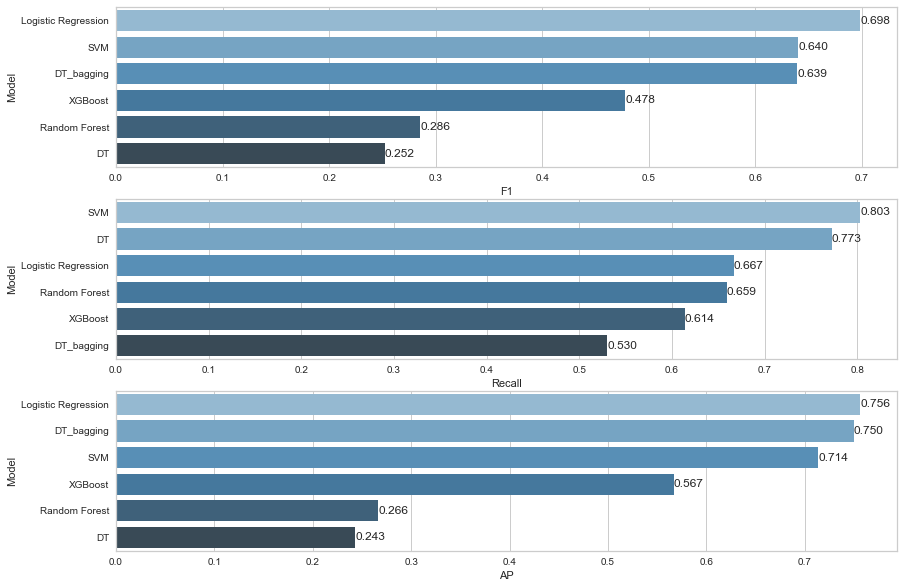

In [139]:
plt.figure(figsize=(14,10))


def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.subplot(311)
compare = compare_df.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare_df.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare_df.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

It is obviously seen that the best model to predict the hispanic soldiers is SVM model, which gives the exactly %80 prediction result. 